This notebook calcualte and plot total fire emissions over the IGP.

In [1]:
# import modules
%run ../load_main.py

WRFchem outputs data path is: dpath=/geos/d21/s1878599/IGP


## Define functions

### plot

In [2]:
#SPATIAL PLOT IGP

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.colorbar import colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

def set_formatter(axes):
    for ax in axes:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_right = False
        gl.ylocator = mticker.FixedLocator([20,25,30,35])
        gl.xlocator = mticker.FixedLocator([70,80,90])
        
        ax.add_feature(cfeature.COASTLINE, lw=0.3)
        ax.add_feature(cfeature.BORDERS, lw=0.3)
        gl.xlabel_style = {'size': 10, 'color': 'grey'}
        gl.ylabel_style = {'size': 10, 'color': 'grey'}

    # get lon values only n the last ax
        if ax==axes[3]:
            gl.xlabels_bottom = True
    
    
def set_admin(axes, shp_path):
    for ax,shp in zip(axes,shp_path):
            admin = list(shpreader.Reader(shp).geometries())
            # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
            ax.add_geometries(admin, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=0.9, lw=0.3)
            


def emiplot(lat,lon,pmds,mds,ads,wds,panels=["(a)","(d)","(g)","(j)"], title=None, label=None, cmap="OrRd",vmax=None, vmin=0,levs=10,delta=None, 
            figsize=[7, 10],format="%.2f",save=False,spath=None,name="plot",savef='pdf', dpi=100):

    fig, axes =plt.subplots(nrows=4,ncols=1,figsize=figsize, subplot_kw={'projection': ccrs.PlateCarree()})
    
    igp_shp="/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/IGP.shp"
    shp_path=(igp_shp,igp_shp,igp_shp,igp_shp)
    
    set_formatter(axes.flatten())
    set_admin(axes.flatten(), shp_path)
 
    #Getting values.
    
    vpm=pmds[0,:,:].values
    vm= mds[0,:,:].values
    va= ads[0,:,:].values 
    vw= wds[0,:,:].values
   
    if vmax is None:
        import math                # Get the max value in the array to plot.
        vmax =np.array([np.nanmax(vpm),np.nanmax(vm),np.nanmax(va),np.nanmax(vw)]).max()        
    
    vmin=vmin
    print(vmax,vmin)
    
    if vmax is None:
        levels = np.linspace(vmin, vmax_v,levs)  # number of levels for which divide the bar. Customised. 
    else:
        levels = np.linspace(vmin, vmax, levs)
    # premonsoon
    cspm=axes[0].contourf(lon,lat,vpm,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    cspm.cmap.set_under('#FFFFFF')#U IGP values.
    cspm.cmap.set_over('#FFFF00')
                                                 
    # monsoon
    csm=axes[1].contourf(lon,lat,vm,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csm.cmap.set_under('#FFFFFF')#U IGP values.
    csm.cmap.set_over('#FFFF00')
    #autumn
    csa=axes[2].contourf(lon,lat,va,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csa.cmap.set_under('#FFFFFF')#U IGP values.
    csa.cmap.set_over('#FFFF00')
    #winter
    csw=axes[3].contourf(lon,lat,vw,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csw.cmap.set_under('#FFFFFF')#U IGP values.
    csw.cmap.set_over('#FFFF00')
    
 
    axes[0].text(-0.2, 0.55, 'PRE-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[0].transAxes)
    axes[1].text(-0.2, 0.55, 'MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[1].transAxes)
    axes[2].text(-0.2, 0.55, 'POST-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[2].transAxes)
    axes[3].text(-0.2, 0.55, 'WINTER', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[3].transAxes)
    
    
    #add panel boxes
    panels=panels
    for ax,p in zip(fig.axes,panels):
        ax.annotate(p, xy=(1, 1), xytext=(-5, -5), fontsize=12,
        xycoords='axes fraction', textcoords='offset points',
        bbox=dict(facecolor='white',edgecolor='white', alpha=0.8),
        horizontalalignment='right', verticalalignment='top')
    
    #cbar
    cbar_ax = fig.add_axes([0.8, 0.15, 0.04, 0.7])  #[left, bottom, width, height]
    cbar= fig.colorbar(csw, cax=cbar_ax,pad=0.1,shrink=0.5, format=format)
    cbar.set_label(label,fontsize=13)
    cbar.ax.tick_params(labelsize='medium')

    #reshape spacing between ticks
    if delta is None:
            delta=int(vmax/10)
            cbar.set_ticks(list(np.arange(vmin, vmax+delta, delta)))
            cbar.set_ticklabels(list(range(vmin, vmax, delta))+[vmax])
           
    
    #title
    if title is not None:
        axes[0].set_title(title, fontsize=12,pad=20)
    
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    
    #save
    if save:
        plt.savefig( spath + name +'.' + savef, format=savef, dpi=dpi,bbox_inches = "tight")
    
    
    fig.show()

### Emissions

The following functions convert emissons rates in emissons inputs(wrffirechemi, wrfchemi,wrfbiochemi) 
to total emissions for each gridpoint and for all domain. This is done for chemical mechanism MOZART-MOSAIC.
Molecular weights for each variable have been derived following the speciation described for the MOZART mechanism in Emmons, Louisa K., et al. "Description and evaluation of the Model for Ozone and Related chemical Tracers, version 4 (MOZART-4)." Geoscientific Model Development 3.1 (2010): 43-67 - (Table 2) and relevant updates in Knote, Christoph, et al. "Simulation of semi-explicit mechanisms of SOA formation from glyoxal in aerosol in a 3-D model." Atmospheric Chemistry and Physics 14.12 (2014): 6213-6239 (Table 1).

In [3]:
def emi_unirates_anthro(ds): 
   
    "Convert gas emissions rates from [mol km-2 hr-1] to [ug m-2 s-1]"

    molw ={ "CO":28, "NO":30,"NO2":46,"SO2":64,"BIGALK":72,"BIGENE":56, "C2H4":28, "C2H5OH":46, "C2H6":30, "C3H8":44, "C3H6":42, 
            "CH2O":30, "CH3CHO":44, "CH3COCH3":58, "CH3OH":32, "MEK":72, "TOLUENE":92, "BENZENE":78,"XYLENE":106, "HONO":47,
            "NH3":17, "C10H16":136, "GLY":58, "MGLY":72, "ISOP":68, "MACR":70, 
            "MVK":70, "HCOOH":46, "C2H2":26}
    
    gug=1e+6 #g to ug.
    km2m2=1e+6 # km2 to m2.
    hrsec=3600 #hour to sec 
    conv = gug/(km2m2*hrsec) 
    dsc=ds.copy(deep=True)
    for sp in molw.keys():
        dsc["E_"+ sp]= dsc["E_"+ sp]*molw[sp]*conv  
        dsc["E_"+ sp].attrs["units"]="ug m-2 s-1"

    return dsc

def calc_hour_emianthro(ds):
    """
    Convert wrffirechemi emissions rates back to emissions.
    
    """
    hrsec=3600 #hour to sec
    ugg=1e-6 #ug to g
    
    dse=ds.copy(deep=True)
    # creating empty da for tot emi.
    for da in dse.data_vars.values():
        if da.name.startswith("E_"):
            dse[da.name]=dse[da.name]*hrsec*ugg   # hourly emissions at each gridpoint.
            dse[da.name].attrs["units"]="g m-2 hour-1"
   
    return dse

def add_tot_hour_emianthro(ds):
    
    ds["tot_emi"]= xr.DataArray(np.zeros(ds.E_CO.shape), coords=ds.coords, dims=ds.dims)
    
    
    for da in ds.data_vars.values():
        if da.name.startswith("E_"):
            ds["tot_emi"]=ds["tot_emi"]+ds[da.name]  #adding to total emissions.
            
    ds["tot_emi"].attrs["units"]="g m-2 hour-1"
    

def calc_avg_day_emianthro(ds):
    # Calculate average daily emissions
    ds["avg_day_emi"]=ds.tot_emi.sum("Time")  
    ds.avg_day_emi.attrs["units"]="g m-2 day-1"
    
    
def calc_emianthro(ds):
    dse= calc_hour_emianthro(emi_unirates_anthro(ds))
    add_tot_hour_emianthro(dse)
    calc_avg_day_emianthro(dse)
    return dse 

## Calculate and plot emissions

In [4]:
# Get seasonal Anthro Emissions
aa_pth =dpath+"/inp_emiss/autumn/emi_base/wrfchemi*"
aw_pth =dpath+"/inp_emiss/winter/emi_base/wrfchemi*"
am_pth =dpath+"/inp_emiss/monsoon/emi_base/wrfchemi*"
apm_pth =dpath+"/inp_emiss/premonsoon/emi_base/wrfchemi*"

aa= xr.open_mfdataset(aa_pth,concat_dim="Time")
aw=xr.open_mfdataset(aw_pth,concat_dim="Time")
am= xr.open_mfdataset(am_pth,concat_dim="Time")
apm= xr.open_mfdataset(apm_pth,concat_dim="Time")

In [5]:
# Calculate emissions
aa_e = calc_emianthro(aa)
aw_e = calc_emianthro(aw)
am_e = calc_emianthro(am)
apm_e = calc_emianthro(apm)

In [6]:
#subset only over IGP
import salem
shdf= salem.read_shapefile("/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/IGP.shp")
aae_igp=aa_e.salem.roi(shape=shdf)
awe_igp=aw_e.salem.roi(shape=shdf)
apme_igp=apm_e.salem.roi(shape=shdf)
ame_igp=am_e.salem.roi(shape=shdf)

30 10


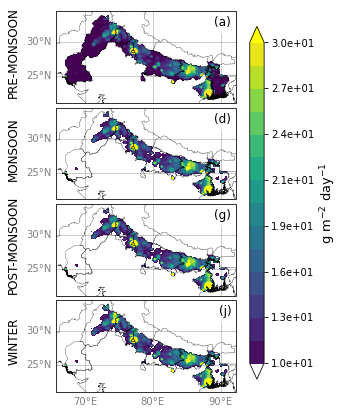

In [7]:
#Plot
lat = aa_e.XLAT[0,:,:]
lon  = aa_e.XLONG[0,:,:]

savepth="./"  
emiplot(lat,lon,ame_igp.avg_day_emi,ame_igp.avg_day_emi,aae_igp.avg_day_emi,awe_igp.avg_day_emi,cmap="viridis", vmin=10,vmax=30,label="g m$^{-2}$ day$^{-1}$", 
        levs=15,delta=5,figsize=[5,7],format="%.1e",save=True, spath=savepth,name="emi_anthro",savef='png', dpi=300)